# Load libraries and data sets

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [9]:
# Load data set "Supply, transformation and consumption of electricity"

path = r'/Users/gomula/Documents/Finalproject'
elect_balance = pd.read_csv(os.path.join(path, '2 Data set', 'Original', 'nrg_cb_em_linear.csv','nrg_cb_em_linear.csv'), index_col=False)
elect_balance.head()

,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:NRG_CB_EM(1.0),10/08/22 23:00:00,M,AIM,E7000,GWH,AL,2018-01,588.340,NaN
1,ESTAT:NRG_CB_EM(1.0),10/08/22 23:00:00,M,AIM,E7000,GWH,AL,2018-02,542.046,NaN
2,ESTAT:NRG_CB_EM(1.0),10/08/22 23:00:00,M,AIM,E7000,GWH,AL,2018-03,564.343,NaN
3,ESTAT:NRG_CB_EM(1.0),10/08/22 23:00:00,M,AIM,E7000,GWH,AL,2018-04,465.565,NaN
4,ESTAT:NRG_CB_EM(1.0),10/08/22 23:00:00,M,AIM,E7000,GWH,AL,2018-05,476.886,NaN


In [10]:
# remove redundant columns
elect_balance.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'siec', 'unit', 'OBS_FLAG'], axis=1, inplace=True)

In [11]:
# define new names for columns
elect_balance.rename(columns={'geo':'country-code', 'TIME_PERIOD':'time-period','nrg_bal':'energy-balance', 'OBS_VALUE':'value(GWH)'}, inplace=True)



In [12]:
# define the codes of countries and fuels
country_codes = {'SK':'Slovakia', 'FI':'Finland', 'SE':'Sweden', 'IS':'Iceland','NO':'Norway', 'UK':'United Kingdom',
                 'ME': 'Montenegro','MK':'North Macedonia', 'GE':'Georgia', 'EU27_2020':'European Union - 27 countries (from 2020)', 
                 'AL':'Albania', 'RS':'Serbia', 'TR':'Turkey', 'BA':'Bosnia and Herzegovina', 'MD':'Moldova', 'UA':'Ukraine',  
                 'EA19':'Euro area - 19 countries (from 2015)', 'BE':'Belgium', 'BG':'Bulgaria', 'CZ':'Czechia', 'DK':'Denmark',
                 'DE':'Germany', 'EE':'Estonia', 'IE':'Ireland', 'EL':'Greece', 'ES': 'Spain', 'FR':'France', 'HR':'Croatia',
                 'IT':'Italy', 'CY':'Cyprus', 'LV':'Latvia', 'LT':'Lithuania', 'LU':'Luxembourg', 'HU':'Hungary', 'MT':'Malta',
                 'NL':'Netherlands', 'AT':'Austria', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SI':'Slovenia'}
len(country_codes)

41

In [13]:
# define the codes of energy balance
energy_code = { 'EXP':'Exports', 'EXP_TO_EU':'Exports to EU', 'TI_EHG_EPS':'Transformation input',
               'DL':'Distribution losses', 'AIM':'Internal market', 'IMP':'Imports', 'IMP_FROM_EU':'Imports from EU'}
len(energy_code)

7

In [14]:
# replace country abbreviations by full name
elect_balance['country'] = list(map(country_codes.get, elect_balance['country-code'].tolist()))

In [15]:
# replace energy balance abbreviations by full name
elect_balance['energy-balance'] = list(map(energy_code.get, elect_balance['energy-balance'].tolist()))

In [16]:
# remove column 'country-code'
elect_balance.drop(columns=['country-code'], axis=1, inplace=True)

In [17]:
# put columns in order
elect_balance = elect_balance[['country', 'time-period', 'energy-balance', 'value(GWH)']]
elect_balance.head()

,country,time-period,energy-balance,value(GWH)
0,Albania,2018-01,Internal market,588.340
1,Albania,2018-02,Internal market,542.046
2,Albania,2018-03,Internal market,564.343
3,Albania,2018-04,Internal market,465.565
4,Albania,2018-05,Internal market,476.886


In [18]:
# shape of the dataset
elect_balance.shape

(28423, 4)

In [19]:
# data type of attributes
elect_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28423 entries, 0 to 28422
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         28423 non-null  object 
 1   time-period     28423 non-null  object 
 2   energy-balance  28423 non-null  object 
 3   value(GWH)      28354 non-null  float64
dtypes: float64(1), object(3)
memory usage: 888.3+ KB


In [20]:
# check for mixed data type in df_ords
for col in elect_balance.columns.tolist():
  weird = (elect_balance[[col]].applymap(type) != elect_balance[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (elect_balance[weird]) > 0:
    print (col + ' contains mixed data types')
  else:
    print (col + ' doesn\'t contain mixed data types')

country doesn't contain mixed data types
time-period doesn't contain mixed data types
energy-balance doesn't contain mixed data types
value(GWH) doesn't contain mixed data types


There is no mixed data type in this dataset. But we have observed 69 null values in 'value(GWH)'

In [21]:
# Descriptive statistics
elect_balance.describe()

,value(GWH)
count,28354.000000
mean,5046.793825
std,20601.016433
min,-75.000000
25%,143.296250
50%,622.822000
75%,2035.903250
max,255910.000000


In [22]:
elect_balance[elect_balance['value(GWH)']<0]

,country,time-period,energy-balance,value(GWH)
20884,Montenegro,2019-02,Imports,-75.0


There is one negative value for elctricity balance of import type which is not logical!

<Axes: ylabel='Frequency'>

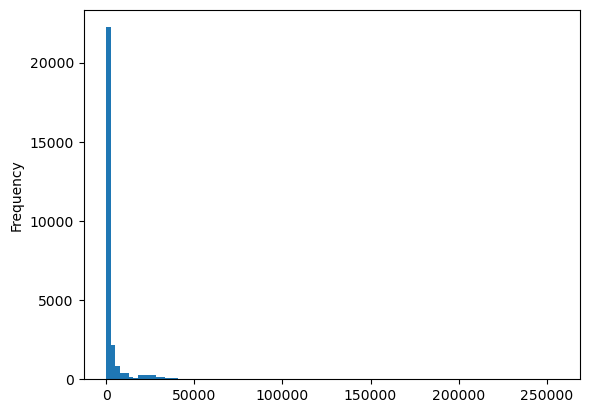

In [23]:
# value distributions
elect_balance['value(GWH)'].plot.hist(bins=100)

There are lots of zero values in this dataset which can be an indication of unavailability of measurements or real measured zero .

In [24]:
# value distribution for country
elect_balance['country'].value_counts()


Spain                                        798
Sweden                                       798
Ireland                                      798
France                                       798
Finland                                      798
Slovenia                                     791
Luxembourg                                   791
Lithuania                                    791
Austria                                      791
Hungary                                      791
Romania                                      791
Netherlands                                  791
Portugal                                     791
Greece                                       791
Estonia                                      791
Norway                                       791
Denmark                                      791
Germany                                      791
Czechia                                      791
Cyprus                                       791
Bulgaria            

In [25]:
# value distribution for energy-balance
elect_balance['energy-balance'].value_counts()

Internal market         6005
Exports                 6005
Imports                 6005
Transformation input    2926
Exports to EU           2518
Imports from EU         2518
Distribution losses     2446
Name: energy-balance, dtype: int64

In [26]:
# remove rows related to 'EU27_2020' & 'EA19' as they are summations for contries in EU and they are not helpful in our analysis
elect_balance.drop(elect_balance[elect_balance['country'].isin(['European Union - 27 countries (from 2020)', 'Euro area - 19 countries (from 2015)'])].index, inplace=True)
len(set(elect_balance['country']))

39

In [27]:
# null values 
elect_balance[elect_balance['value(GWH)'].isnull()]

,country,time-period,energy-balance,value(GWH)
7077,Croatia,2017-01,Distribution losses,NaN
7078,Croatia,2017-02,Distribution losses,NaN
7079,Croatia,2017-03,Distribution losses,NaN
7080,Croatia,2017-04,Distribution losses,NaN
7081,Croatia,2017-05,Distribution losses,NaN
...,...,...,...,...
7759,Netherlands,2017-10,Distribution losses,NaN
12763,Netherlands,2018-05,Exports,NaN
16241,Netherlands,2018-05,Exports to EU,NaN
21286,Netherlands,2018-05,Imports,NaN


In [28]:
# to handle negative value and nulls we substitute them with zero
elect_balance.loc[(elect_balance['value(GWH)'].isnull() | (elect_balance['value(GWH)']<0)),'value(GWH)']=0

In [29]:
# check for duplicates
elect_balance[elect_balance.duplicated()]

,country,time-period,energy-balance,value(GWH)


### There is no duplicated rows

In [30]:
# reset index for new data set
elect_balance.reset_index(drop=True, inplace=True)
elect_balance

,country,time-period,energy-balance,value(GWH)
0,Albania,2018-01,Internal market,588.340
1,Albania,2018-02,Internal market,542.046
2,Albania,2018-03,Internal market,564.343
3,Albania,2018-04,Internal market,465.565
4,Albania,2018-05,Internal market,476.886
...,...,...,...,...
27004,United Kingdom,2020-06,Transformation input,116.476
27005,United Kingdom,2020-07,Transformation input,105.176
27006,United Kingdom,2020-08,Transformation input,130.364
27007,United Kingdom,2020-09,Transformation input,135.431


## The final form of the 'elect_balance' data frame will be as follow

In [31]:
elect_balance.head()

,country,time-period,energy-balance,value(GWH)
0,Albania,2018-01,Internal market,588.340
1,Albania,2018-02,Internal market,542.046
2,Albania,2018-03,Internal market,564.343
3,Albania,2018-04,Internal market,465.565
4,Albania,2018-05,Internal market,476.886


In [32]:
elect_balance.shape

(27009, 4)

In [33]:
elect_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27009 entries, 0 to 27008
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27009 non-null  object 
 1   time-period     27009 non-null  object 
 2   energy-balance  27009 non-null  object 
 3   value(GWH)      27009 non-null  float64
dtypes: float64(1), object(3)
memory usage: 844.2+ KB


In [34]:
elect_balance.describe()


,value(GWH)
count,27009.000000
mean,2354.252072
std,5950.586755
min,0.000000
25%,124.502000
50%,569.000000
75%,1629.000000
max,57460.000000


<Axes: ylabel='Frequency'>

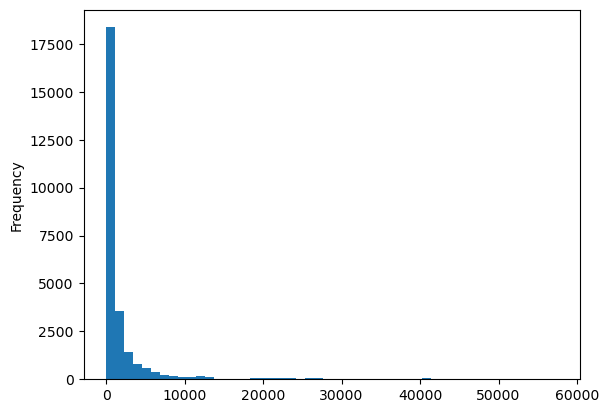

In [35]:
elect_balance['value(GWH)'].plot.hist(bins=50)

In [36]:
# Save data set in pickle and csv formats
elect_balance.to_csv(os.path.join(path, '2 Data set', 'Modified', 'elect_balance.csv'))
elect_balance.to_pickle(os.path.join(path, '2 Data set', 'Modified', 'elect_balance.pkl'))